## Elastic-Net Regression (L1 + L2)

- Elastic Net regression is a linear regression technique that combines the L1 (Lasso) and L2 (Ridge) regularization methods. It is used to handle multicollinearity and perform feature selection in high-dimensional datasets.

- rho is the mixing parameter that balances the contributions of L1 and L2 regularization. When rho = 1, Elastic Net becomes equivalent to Lasso regression, and when rho = 0, it becomes equivalent to Ridge regression.

- Elastic Net is particularly useful when dealing with datasets that have many correlated features or when you suspect that some features are irrelevant or redundant. By tuning the alpha and rho parameters, you can control the amount and type of regularization, allowing for a flexible and powerful approach to linear regression in high-dimensional data scenarios.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [97]:
# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1)  # Input features
y = 2 * X + np.random.normal(0, 0.5, size=(100, 1))  # Target variable with noise

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
# Create and train the Elastic-Net regression model
alpha = 0.1  # (aka lambda) The regularization strength (higher values mean more regularization)
l1_ratio = 0.5  # (aka rho) The mix of L1 (Lasso) and L2 (Ridge) regularization penalties (0.0 for L2, 1.0 for L1)

elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16489882031608566


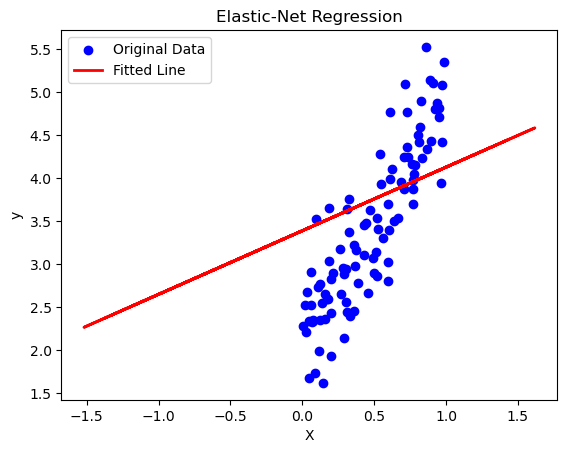

In [120]:
# Plot the original data and the fitted line
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Elastic-Net Regression')
plt.legend()
plt.show()

In Elastic-Net regression, the alpha value is a hyperparameter that controls the strength of regularization. Alpha represents a balance between L1 (Lasso) and L2 (Ridge) regularization. Different values of alpha influence the behavior of the model and the coefficients.

&#8594; High Alpha (Strong Regularization):
- When alpha is high, regularization is strong, promoting coefficients to be closer to zero. High alpha values increase sparsity, meaning some coefficients tend to be exactly zero, leading to feature selection.
- Strong regularization can reduce overfitting, making the model simpler and more generalizable.

&#8594; Low Alpha (Weak Regularization):

- With a low alpha, regularization is weak, allowing coefficients to take larger values. Low alpha values enable the model to better fit the training data and make more precise predictions.
- Weak regularization may lead to complex models that fit the training data well but may overfit.

&#8594; Optimal Alpha Value:

- The optimal alpha value is the one where the model achieves the best performance on a specific dataset.
- Finding the optimal alpha can be done using hyperparameter tuning techniques (e.g., cross-validation). Cross-validation involves trying different alpha values and evaluating model performance to select the most suitable hyperparameter.


/Users/iremkurt/anaconda3/envs/slit/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+01, tolerance: 4.762e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


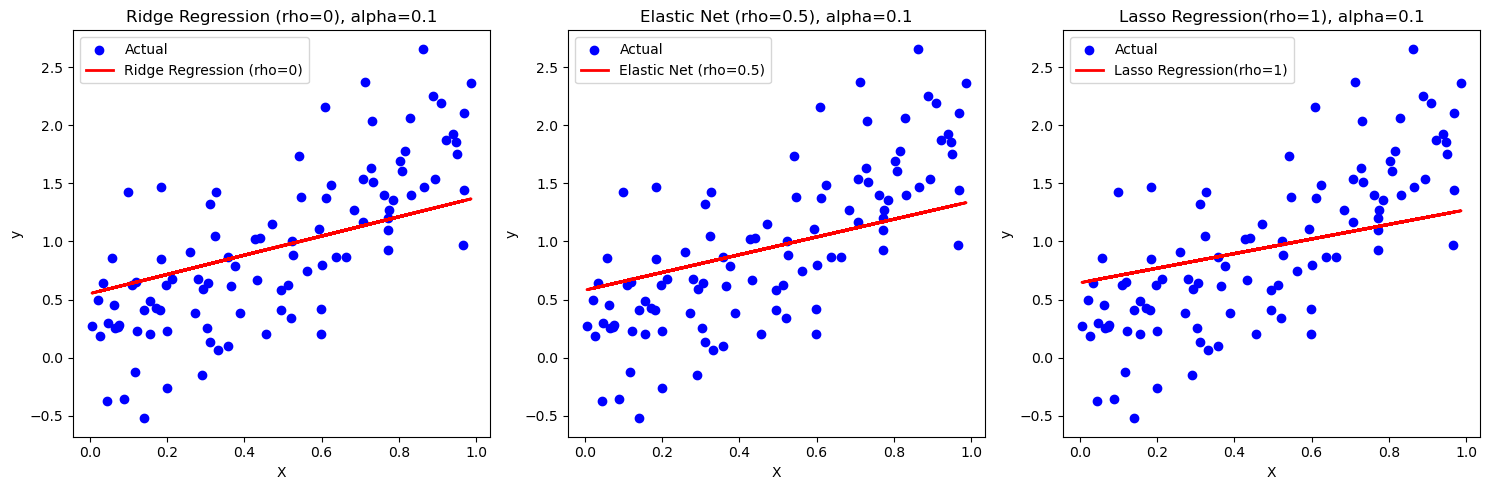

In [32]:
# Create a range of alpha values (regularization strength)
alpha = 0.1

# Plot the results
plt.figure(figsize=(15, 5))
for idx, rho in enumerate([0, 0.5, 1]):
    # Create and fit the Elastic Net regression model
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=rho)
    elastic_net.fit(X, y)

    # Predict on the input data
    y_pred = elastic_net.predict(X)

    # Determine the regression type based on rho value
    regression_type = "Ridge Regression (rho=0)" if rho == 0 else "Lasso Regression(rho=1)" if rho == 1 else "Elastic Net (rho={})".format(rho)

    # Plot the results
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, y_pred, color='red', label=regression_type, linewidth=2)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'{regression_type}, alpha={alpha}')
    plt.legend()

plt.tight_layout()
plt.show()

## Interpretation

- Coefficients: Coefficients represent feature weights. Positive means a feature positively influences the target, negative means a negative influence.

- Sparsity & Feature Selection: Elastic-Net can push some coefficients to zero, effectively selecting the most important features.

- Regularization Strength (Alpha): Higher alpha means stronger regularization, simpler model but may underfit. Lower alpha may overfit.

- L1 (Lasso) and L2 (Ridge) Regularization (l1_ratio): l1_ratio balances Lasso (sparsity) and Ridge (shrinkage). Closer to 1 favors sparsity, closer to 0 favors shrinkage.

- Model Evaluation: Use metrics like MSE or RMSE to assess model performance. Lower values indicate better performance. R-squared measures how well the model explains variance in the target variable.

## Comparison of Elastic Net, Lasso, and Ridge Regression

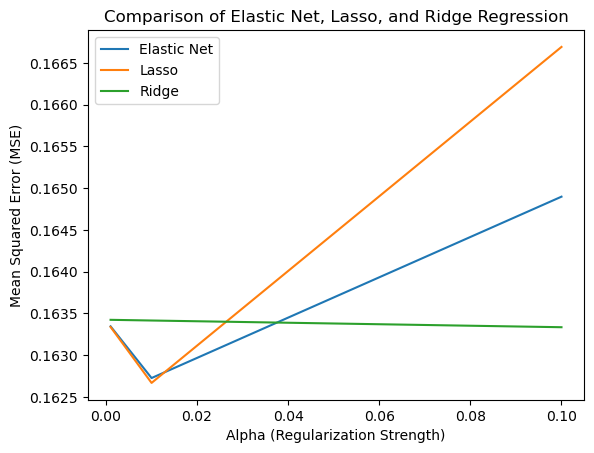

In [103]:
# Define a range of alpha values to test
alphas = [0.1, 0.01, 0.001]

# Create and train Elastic-Net, Lasso, and Ridge regression models for each alpha
mse_elasticnet = []
mse_lasso = []
mse_ridge = []

for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net.fit(X_train, y_train)
    y_pred_elasticnet = elastic_net.predict(X_test)
    mse_elasticnet.append(mean_squared_error(y_test, y_pred_elasticnet))

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso.append(mean_squared_error(y_test, y_pred_lasso))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))

# Plot the MSE values for each alpha
plt.plot(alphas, mse_elasticnet, label='Elastic Net')
plt.plot(alphas, mse_lasso, label='Lasso')
plt.plot(alphas, mse_ridge, label='Ridge')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Elastic Net, Lasso, and Ridge Regression')
plt.legend()
plt.show()